In [1]:
#| default_exp MNIST

# Core Fuctions
> fastai를 이용해 MNIST로 영상 처리를 학습하는 방법입니다.

In [2]:
from fastai.vision.all import *

path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
path.ls()

(#3) [Path('/Users/leejaewon/.fastai/data/mnist_sample/valid'),Path('/Users/leejaewon/.fastai/data/mnist_sample/labels.csv'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train')]

In [4]:
(path/'train').ls()

(#2) [Path('/Users/leejaewon/.fastai/data/mnist_sample/train/7'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3')]

In [5]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10000.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10011.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10031.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10034.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10042.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10052.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/1007.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10074.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10091.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10093.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10097.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10099.png'),Path('/Users/leejaewon/.fastai/data/mnist_sample/train/3/10116.png'),Path('/Users/leejaewon/.fasta

In [6]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [7]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [8]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [9]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [10]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

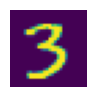

In [11]:
show_image(three_tensors[1])

In [12]:
#형변환
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [13]:
#속성의 길이 = 랭크
len(stacked_threes.shape)

3

In [14]:
#차원 = 길이가 3인 벡터? 랭크? 축의 크기? 축의 개수?
stacked_threes.ndim

3

<Axes: >

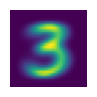

In [15]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

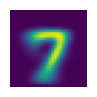

In [16]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

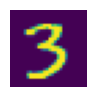

In [17]:
a_3 = stacked_threes[1]
show_image(a_3)

In [18]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [20]:
tns[1]

tensor([4, 5, 6])

In [21]:
tns[:,1]

tensor([2, 5])

In [22]:
tns[1,1:3]

tensor([5, 6])

In [23]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [24]:
tns.type()

'torch.LongTensor'

In [25]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [26]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                                   for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                                   for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [27]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)

tensor(0.1114)

In [28]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]))

In [29]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [30]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [31]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float().mean())

accuracy_3s, accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

# 확률적 경사 하강법 (SGD)

In [32]:
def pr_three(x,w): return (x*w).sum()

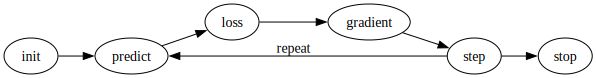

In [33]:
from fastbook import *

#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [34]:
def f(x): return x**2

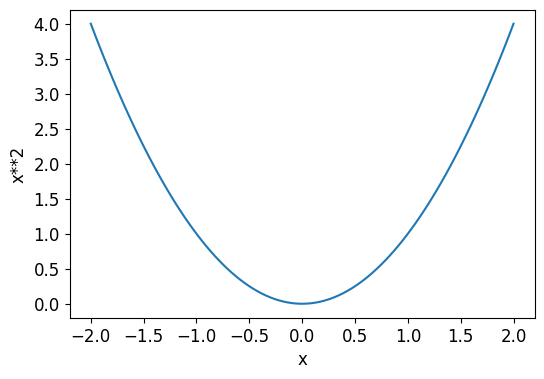

In [35]:
plot_function(f, 'x', 'x**2')

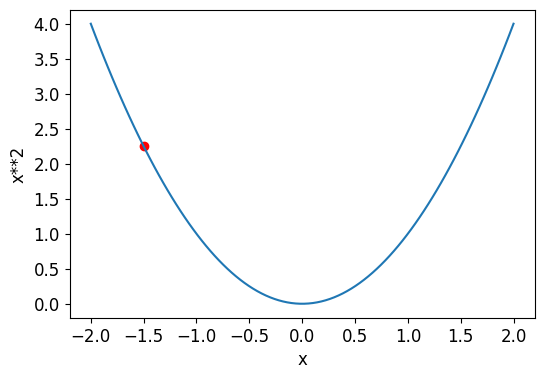

In [36]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In [37]:
#특정 값의 변수에 대한 그레이디언트를 계산할 때 아래 과정으로 계산
#예시 1
xt = tensor(3.).requires_grad_()
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [38]:
#역전파
yt.backward()
xt.grad

tensor(6.)

In [39]:
#예시2
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [40]:
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [41]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

#학습률
w -= w.grad * lr

In [44]:
##SGD를 활용한 시작부터 끝까지 보여주는 예제
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

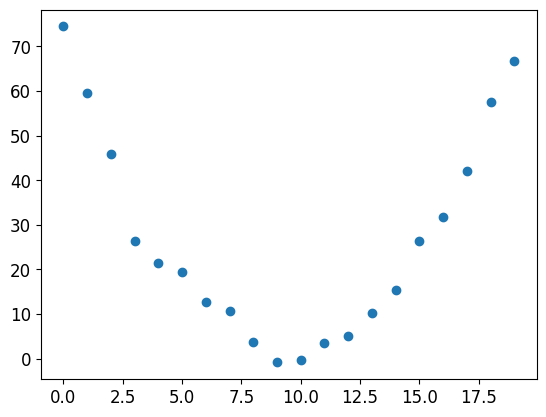

In [45]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed)

In [46]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [71]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [99]:
# 1단계: 파라미터 초기화
params = torch.randn(3).requires_grad_()
params

tensor([-0.7409,  0.3618,  1.9199], requires_grad=True)

In [100]:
# 2단계: 예측 계산
preds = f(time,params)

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time,speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

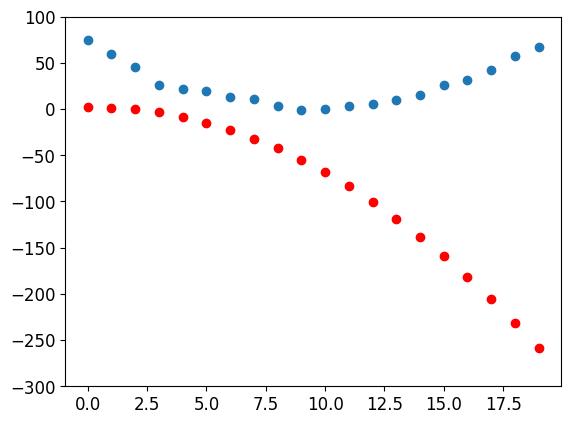

In [101]:
show_preds(preds)

In [102]:
# 3단계: 손실 계산
loss = mse(preds, speed)
loss

tensor(20835.4688, grad_fn=<MeanBackward0>)

In [103]:
# 4단계: 그레디언트 계산
loss.backward()
params.grad

tensor([-47636.9297,  -3044.1543,   -225.4613])

In [104]:
params.grad*1e-5

tensor([-0.4764, -0.0304, -0.0023])

In [105]:
params

tensor([-0.7409,  0.3618,  1.9199], requires_grad=True)

In [106]:
# 5단계: 가중치를 한 단계 갱신하기
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [107]:
preds = f(time,params)
mse(preds,speed)

tensor(4486.4795, grad_fn=<MeanBackward0>)

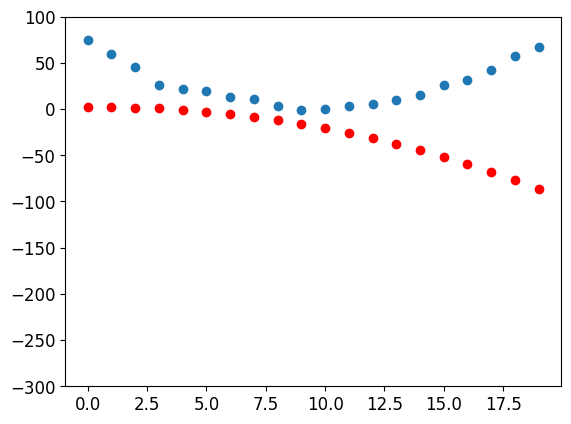

In [108]:
show_preds(preds)

In [109]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds,speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [97]:
# 6단계: 과정 반복하기
for i in range(10): apply_step(params)

4858.03515625
1492.681396484375
855.8507080078125
735.3397216796875
712.532470703125
708.2136840820312
707.3934326171875
707.2352294921875
707.2023315429688
707.1930541992188


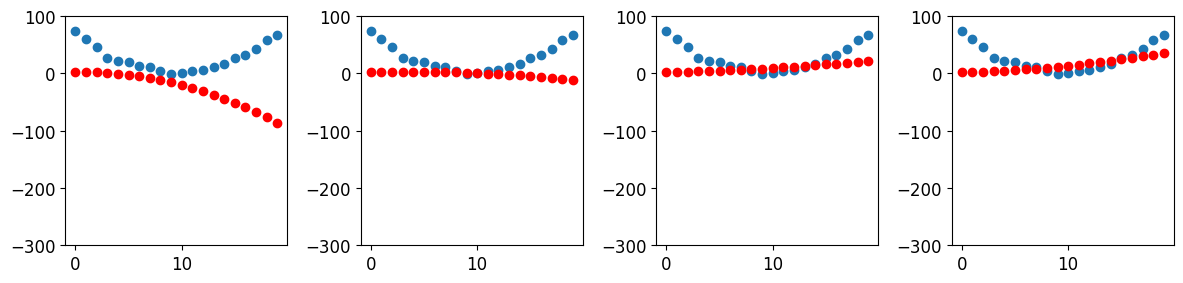

In [110]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [ ]:
# 7단계: 학습 종료


# 4.5 MNIST 손실 함수


In [113]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [ ]:
#크기가 1인 차원을 만든다
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [115]:
dset = list(zip(train_x,train_y))
x,y=dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [117]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1,28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [129]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28,1))

In [130]:
bias = init_params(1)

In [131]:
(train_x[0]*weights.T).sum() + bias

tensor([-2.7666], grad_fn=<AddBackward0>)

In [132]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[-2.7666],
        [ 1.9167],
        [ 5.2842],
        ...,
        [-3.2984],
        [ 3.4165],
        [-5.3592]], grad_fn=<AddBackward0>)

In [133]:
corrects = (preds>0.5).float() == train_y
corrects

tensor([[False],
        [ True],
        [ True],
        ...,
        [ True],
        [False],
        [ True]])

In [134]:
corrects.float().mean().item()

0.47370120882987976

In [137]:
with torch.no_grad(): weights[0] *= 1.0001

preds = linear1(train_x)
((preds>0.5).float() == train_y).float().mean().item()

0.47370120882987976

In [142]:
trgts = tensor([1,0,1])
prds = tensor([0.9,0.4,0.2])

def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

torch.where(trgts==1, 1-prds,prds)

tensor([0.1000, 0.4000, 0.8000])

In [143]:
#DataLoader : 파이토치와 fastai에서 임의로 데이터셋을 뒤섞고 미니배치를 만듬
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([10,  4,  1,  2,  6]),
 tensor([ 8,  7,  9, 13, 11]),
 tensor([ 0, 12,  5, 14,  3])]

In [144]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [145]:
mnist_loss(tensor([0.9,0.4,0.8]),trgts)

tensor(0.2333)

In [146]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [139]:
#Dataset : 독립 변수와 종속변수 쌍을 다룸
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j'),(10, 'k'),(11, 'l'),(12, 'm'),(13, 'n'),(14, 'o'),(15, 'p'),(16, 'q'),(17, 'r'),(18, 's'),(19, 't')...]

In [141]:
#DataLoader로 Dataset을 넣어주면 독립변수와 종속변수 쌍을 표현한 텐서의 배치 목록을 얻을 수 있다
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([19, 14,  0, 24, 20, 12]), ('t', 'o', 'a', 'y', 'u', 'm')),
 (tensor([23,  8,  9,  3, 16,  6]), ('x', 'i', 'j', 'd', 'q', 'g')),
 (tensor([ 4,  7,  1, 13,  2, 22]), ('e', 'h', 'b', 'n', 'c', 'w')),
 (tensor([ 5, 17, 18, 10, 11, 15]), ('f', 'r', 's', 'k', 'l', 'p')),
 (tensor([25, 21]), ('z', 'v'))]

In [147]:
weights = init_params((28*28,1))
bias = init_params(1)

In [148]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [149]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [150]:
batch=train_x[:4]
batch.shape

torch.Size([4, 784])

In [151]:
preds = linear1(batch)
preds

tensor([[-5.3552],
        [-6.9876],
        [-1.4430],
        [-4.0543]], grad_fn=<AddBackward0>)

In [153]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.9466, grad_fn=<MeanBackward0>)

In [154]:
loss.backward()
weights.grad.shape, weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0065), tensor([-0.0442]))

In [155]:
#하나의 함수로
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [157]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0194), tensor([-0.1327]))

In [ ]:
#loss.backwar는 지금 계산된 손실의 그레이디언트를 앞서 계산된 그레이디언트에 더하기 때문에 이전 그레이디언트를 0으로 설정해줘야 함.
weights.grad.zero_()
bias.grad.zero_()

###메서드 중 이름의 마지막에 밑줄이 포함된 것은 해당 객체를 제자리에서 조작

In [158]:
def train_epoch(model, lr, params):
    for xb, yb, in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [159]:
(preds>0.5).float()==train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [160]:

def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [161]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [162]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [163]:
validate_epoch(linear1)

0.2445

In [164]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.4918

In [ ]:
#위 내용 반복
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.5993 0.6474 0.8476 0.9096 0.9306 0.9428 0.9486 0.9511 0.955 0.9574 0.9579 0.9589 0.9598 0.9623 0.9632 0.9632 0.9642 0.9662 0.9662 0.9662 

In [166]:
#옵티마이저 만들기
#모듈 : 파이토치의 nn.Module 클래스를 상속받은 클래스 객체
#nn.linear는 init_params와 linear의 작동을 하나로 수행
linear_model = nn.Linear(28*28,1)

In [167]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [168]:
class BasicOptim:
    def __init__(self,params,lr): self.params, self.lr = list(params),lr
    def step(self, *args,**kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad=None

In [170]:
opt = BasicOptim(linear_model.parameters(), lr)

In [171]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        opt.step()
        opt.zero_grad()

In [172]:
validate_epoch(linear_model)

0.6145

In [173]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [174]:
train_model(linear_model, 20)

0.4932 0.7998 0.8515 0.916 0.9346 0.9487 0.9555 0.9624 0.9658 0.9673 0.9697 0.9712 0.9736 0.9751 0.9761 0.977 0.9775 0.978 0.978 0.9785 

In [ ]:
#SGD = BasicOptim
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(),lr)
train_model(linear_model,20)

0.4932 0.6987 0.8672 0.9184 0.9365 0.9502 0.956 0.9643 0.9658 0.9678 0.9697 0.9717 0.9741 0.9751 0.9761 0.977 0.9775 0.978 0.9785 0.9785 

In [ ]:
#tLearner.fit = train_model
#Dataloader = 트럭 한 대, Dataloaders = 운송회사
dls = DataLoaders(dl,valid_dl)

learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [181]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637359,0.503237,0.495584,00:00
1,0.451160,0.258699,0.760550,00:00
2,0.168915,0.160382,0.856722,00:00
3,0.075551,0.098931,0.917566,00:00
4,0.041024,0.073727,0.935721,00:00
5,0.027472,0.059737,0.950442,00:00
6,0.021874,0.050919,0.958292,00:00
7,0.019363,0.044995,0.964181,00:00
8,0.018073,0.040796,0.966143,00:00
9,0.017286,0.037681,0.969087,00:00


In [182]:
#복잡한 일을 다루려면 두 선형 분류 모델(계층) 사이에 비선형성을 추가해야 한다. => 신경망
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [43]:
#| export